In [6]:
#run with python2
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon

#%matplotlib 

# Plan

In [7]:
astroplan.download_IERS_A()

In [8]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
#plt.rcParams['axes.prop_cycle'] = custom_cycler
#plt.rc('axes', prop_cycle=custom_cycler)

for d in colors:
    print(d)

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [9]:
observer = astroplan.Observer.at_site('keck')


In [10]:
today = Time('2023-09-07 04:20:00', scale='utc')


In [60]:
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)


twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)

pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)

pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg eve twilight', pre_twi15deg.iso)



handoff = Time('2023-09-07 07:50:00', scale='utc')

12 deg morn twilight 2023-09-07 15:19:39.379
18 deg morn twilight 2023-09-07 14:53:32.435
18 deg eve twilight 2023-09-07 05:46:46.648
15 deg morn twilight 2023-09-07 15:06:37.967
15 deg eve twilight 2023-09-07 05:33:41.721


In [12]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg morn twilight', pre_twi12deg.iso)

12 deg morn twilight 2023-09-07 05:20:40.358


#### Standards

In [13]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')

In [14]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600, LTT9239 ]

#### Choose Standards for the night

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

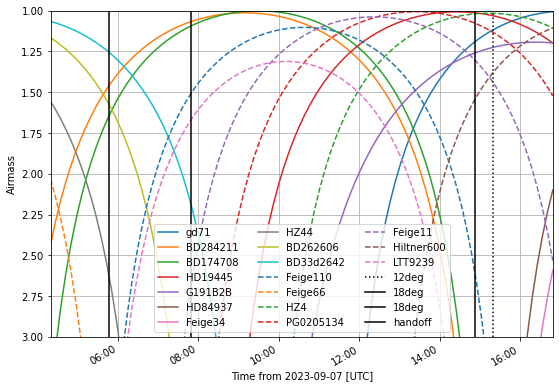

In [15]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.52, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [16]:
chosen_stds = [Feige110, G191B2B]

#### Targets

In [17]:

sn2019cvz = astroplan.FixedTarget(coord=SkyCoord('16:30:54.00', '+46:35:18.2', unit=(u.hourangle, u.degree)),
                                  name='2019cvz')

sn2023pcw = astroplan.FixedTarget(coord=SkyCoord('00:54:18.46', '-40:23:33.2', unit=(u.hourangle, u.degree)),
                                  name='2023pcw')
sn2023qre = astroplan.FixedTarget(coord=SkyCoord('20:50:59.19 +06:08:18.7', unit=(u.hourangle, u.degree)),
                                  name='2023qre')
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                  name='2021yja')
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                  name='2022xkq')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                  name='2022acko')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                  name='2023cr')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                  name='2022erq')
sn2023aew = astroplan.FixedTarget(coord=SkyCoord('17:40:51.36', '+66:12:22.7', unit=(u.hourangle, u.degree)),
                                  name='2023aew')


In [18]:
targets = [sn2023pcw, sn2023qre, sn2021yja, sn2022xkq, sn2022acko, sn2023cr, sn2022erq, sn2023aew]#sn2019edo,sn2019cth, sn2019ein, sn2019np,, AT2019qyl, sn2018evt

#### Plot Objects for the night

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

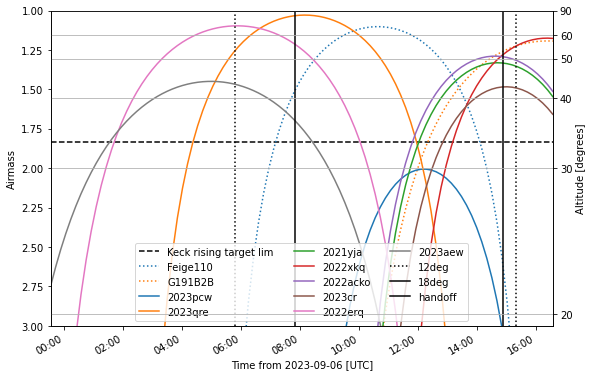

In [19]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.51, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

# Make a schedule

In [171]:
tab = """2023aew  17:40:51.36  +66:12:22.7  20  1x1000
Feige110  23:19:58.39   -05:09:55.8  11.83 1x60
2023qea   18:09:04.97   +42:34:21.7  19    1x900
2022erq   18:33:25.36   +44:05:11.6  19.5  2x900
2023qre   20:50:59.19   +06:08:18.7  19.5    2x900
2023ehl   20:25:10.75   +05:15:24.3  20    1x900
2023rau   00:20:55.24   -01:45:28.5  19    2x600
humidity  00:00:00.00   -90:00:00.0  30    5x1100
2022acko  03:19:38.98   -19:23:42.5  19.5  2x900
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
2021yja   03:24:21.17   -21:33:56.2  22-23 2x1200
2022xkq   05:05:23.71   -11:52:56.1  22    3x1100
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
end      00:00:00.00   -90:00:00.0 11    1x1""" 
#2023pcw   00:54:18.46   -40:23:33.2  19    2x700
#G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
#2022yvw   03:33:45.28   -19:29:29.9  21-22 1x1100
#2023gft   21:26:01.32   -03:47:53.6  18.5  1x600
#2022abom  03:41:09.14 -02:50:54.8    22    2x1200
#placeholder 00:00:00    00:00:00     0     2x1200
#2023cr    03:42:13.07   -27:52:16.6  20    2x1200
#2023cpt   15:21:33.36   -13:05:21.7  21    1x1200
#2023aew  17:40:51.36  +66:12:22.7  20  2x1000
#2023cr    03:42:13.07   -27:52:16.6  20    2x1200
#2019edo  12:11:51.59   +24:08:11.2 20    1x900
#2018evt  13:46:39.21   -09:38:35.8 18.5  1x600
#2019qyl  00:54:57.53   -37:38:39.5 19    1x600
#2019hnl  23:43:10.24 -02:56:58.7   19       2x600
#2022yvw   03:33:45.28 -19:29:29.9    21    1x1200

In [172]:
sn2023pcw = astroplan.FixedTarget(coord=SkyCoord('00:54:18.46', '-40:23:33.2', unit=(u.hourangle, u.degree)),
                                  name='2023pcw')
sn2023qre = astroplan.FixedTarget(coord=SkyCoord('20:50:59.19', '+06:08:18.7', unit=(u.hourangle, u.degree)),
                                  name='2023qre')
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                  name='2021yja')
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                  name='2022xkq')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                  name='2022acko')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                  name='2023cr')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                  name='2022erq')
sn2023aew = astroplan.FixedTarget(coord=SkyCoord('17:40:51.36', '+66:12:22.7', unit=(u.hourangle, u.degree)),
                                  name='2023aew')

In [173]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [174]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [175]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
2023aew,17:40:51.36,+66:12:22.7,20,1x1000,1.0,1000.0
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0
2023qea,18:09:04.97,+42:34:21.7,19,1x900,1.0,900.0
2022erq,18:33:25.36,+44:05:11.6,19.5,2x900,2.0,900.0
2023qre,20:50:59.19,+06:08:18.7,19.5,2x900,2.0,900.0
2023ehl,20:25:10.75,+05:15:24.3,20,1x900,1.0,900.0
2023rau,00:20:55.24,-01:45:28.5,19,2x600,2.0,600.0
humidity,00:00:00.00,-90:00:00.0,30,5x1100,5.0,1100.0
2022acko,03:19:38.98,-19:23:42.5,19.5,2x900,2.0,900.0


In [176]:
#night_start = Time(pre_twi15deg.iso)
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [177]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

In [178]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [179]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object,str23
2023aew,17:40:51.36,+66:12:22.7,20,1x1000,1.0,1000.0,2023-09-07 07:50:00.000,2023-09-07 07:50:00.000
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0,2023-09-07 08:11:40.000,2023-09-07 08:11:40.000
2023qea,18:09:04.97,+42:34:21.7,19,1x900,1.0,900.0,2023-09-07 08:17:40.000,2023-09-07 08:17:40.000
2022erq,18:33:25.36,+44:05:11.6,19.5,2x900,2.0,900.0,2023-09-07 08:37:40.000,2023-09-07 08:37:40.000
2023qre,20:50:59.19,+06:08:18.7,19.5,2x900,2.0,900.0,2023-09-07 09:14:47.000,2023-09-07 09:14:47.000
2023ehl,20:25:10.75,+05:15:24.3,20,1x900,1.0,900.0,2023-09-07 09:51:54.000,2023-09-07 09:51:54.000
2023rau,00:20:55.24,-01:45:28.5,19,2x600,2.0,600.0,2023-09-07 10:11:54.000,2023-09-07 10:11:54.000
humidity,00:00:00.00,-90:00:00.0,30,5x1100,5.0,1100.0,2023-09-07 10:39:01.000,2023-09-07 10:39:01.000
2022acko,03:19:38.98,-19:23:42.5,19.5,2x900,2.0,900.0,2023-09-07 12:24:09.000,2023-09-07 12:24:09.000


/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

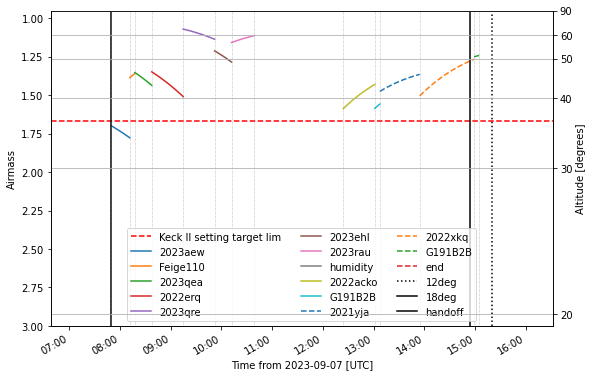

In [180]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
#ax.axvline(pre_twi18deg.plot_date, color='k', label='18deg', ls=':')
#ax.axvline(pre_twi15deg.plot_date, color='gray', label='15deg', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [449]:
1/np.cos(((90-18)*u.degree).to(u.radian))

<Quantity 3.23606798>

In [218]:
7000-5300/2, 7000+5300/2

(4350.0, 9650.0)

AttributeError: 'AxesSubplot' object has no attribute 'set_theta_zero_location'

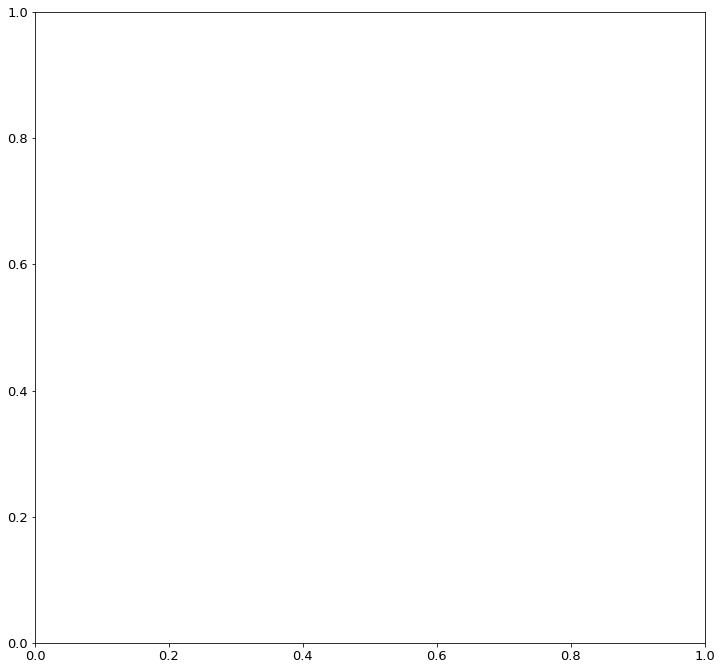

In [460]:
start_tbdata = tbdata['start']
polor_style = []
if np.size(start_tbdata) <= 10:
    for indx, cycle in enumerate(custom_cycler):
        polor_style.append(cycle)
else:
    colors = ['1f77b4','aec7e8','ff7f0e','ffbb78','2ca02c','98df8a','d62728','ff9896',
    '9467bd','c5b0d5','8c564b','c49c94','e377c2','f7b6d2','7f7f7f','c7c7c7','bcbd22','dbdb8d','17becf','9edae5']
    custom_cycler1 = cycler(linestyle=['-'])*cycler(color=colors)
    for indx, cycle in enumerate(custom_cycler1):
        polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
#obs_end = twi12deg
obs_end = handoff
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('1')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('0')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots.pdf')

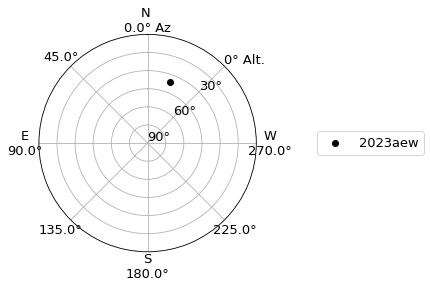

In [463]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky

observe_time = Time(['2023-09-07 07:50:00.000'])

polaris_style = {'color': 'k'}
vega_style = {'color': 'g'}
deneb_style = {'color': 'r'}
sn2023aew = astroplan.FixedTarget(coord=SkyCoord('17:40:51.36', '+66:12:22.7', unit=(u.hourangle, u.degree)),
                                  name='2023aew')
plot_sky(sn2023aew, observer, observe_time, style_kwargs=polaris_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [471]:
observer

<Observer: name='keck',
    location (lon, lat, el)=(-155.47833333333335 deg, 19.828333333333333 deg, 4160.000000000756 m),
    timezone=<UTC>>

In [477]:
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
observe_time = Time(['2023-09-07 07:50:00.000','2023-09-07 08:10:00.000'])
sn2023aew = SkyCoord('17:40:51.36', '+66:12:22.7', unit=(u.hourangle, u.degree))
earth_location = EarthLocation.from_geodetic(-155.47833333333335*u.deg, 19.828333333333333*u.deg)  
xx = sn2023aew.transform_to(AltAz(obstime=observe_time,location=earth_location))
xx

<SkyCoord (AltAz: obstime=['2023-09-07 07:50:00.000' '2023-09-07 08:10:00.000'], location=(-5460927.41942143, -2491182.39786944, 2149829.109399) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(340.12597797, 36.03593778), (338.7101321 , 34.37649396)]>

# for imaging

In [ ]:
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

In [275]:
tab = """2019qyl  00:54:57.53   -37:38:39.5 19    1x600
Feige110  23:19:58.39   -05:09:55.8  11.83 1x60
2019nyk  00:15:15.21   -08:11:21.8 19.5  1x900
2019hnl  23:43:10.24   -02:56:58.7 21    1x1200
2019iex  23:51:03.61   +20:08:43.7 19    1x600
2019jyw  01:06:30.21   -02:11:56.3 19.5  1x900
2019udc  01:53:11.18   +04:11:46.9 19    1x600
2019muj  02:26:18.55   -09:50:09.0 20.4  1x1200
2018jky  03:26:01.93   -17:33:48.0 23    4x1200
2018jky_RI  03:26:01.93   -17:33:48.0 23    6x120
PG0205134  02:08:03.44   +13:36:30.9  14.87  2x1
2019pxo  03:15:18.37   +42:41:44.0 20    1x900
2019osl  04:38:54.33   +18:50:10.2 19    1x600
2019eez  06:16:22.26   -21:21:35.7 19.5  1x900
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
end      00:00:00.00   +00:00:00.0 11    1x1""" 
#2019hvv  01:14:24.37   -07:28:31.7 22    2x900
#2019hvv_RI   01:14:24.37   -07:28:31.7 22 6x120

In [276]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [277]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [278]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
str10,str11,str11,str10,str10,float64,float64
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0
2019nyk,00:15:15.21,-08:11:21.8,19.5,1x900,1.0,900.0
2019hnl,23:43:10.24,-02:56:58.7,21,1x1200,1.0,1200.0
2019iex,23:51:03.61,+20:08:43.7,19,1x600,1.0,600.0
2019jyw,01:06:30.21,-02:11:56.3,19.5,1x900,1.0,900.0
2019udc,01:53:11.18,+04:11:46.9,19,1x600,1.0,600.0
2019muj,02:26:18.55,-09:50:09.0,20.4,1x1200,1.0,1200.0
2018jky,03:26:01.93,-17:33:48.0,23,4x1200,4.0,1200.0


In [279]:
night_start = Time(pre_twi15deg.iso)
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [280]:
tbdata.write('../plan_imaging.txt', format='ascii.fixed_width', overwrite=True)

In [281]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [282]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
str10,str11,str11,str10,str10,float64,float64,object,str23
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0,2019-12-22 04:53:10.299,2019-12-22 04:53:10.299
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0,2019-12-22 05:08:10.299,2019-12-22 05:08:10.299
2019nyk,00:15:15.21,-08:11:21.8,19.5,1x900,1.0,900.0,2019-12-22 05:14:10.299,2019-12-22 05:14:10.299
2019hnl,23:43:10.24,-02:56:58.7,21,1x1200,1.0,1200.0,2019-12-22 05:34:10.299,2019-12-22 05:34:10.299
2019iex,23:51:03.61,+20:08:43.7,19,1x600,1.0,600.0,2019-12-22 05:59:10.299,2019-12-22 05:59:10.299
2019jyw,01:06:30.21,-02:11:56.3,19.5,1x900,1.0,900.0,2019-12-22 06:14:10.299,2019-12-22 06:14:10.299
2019udc,01:53:11.18,+04:11:46.9,19,1x600,1.0,600.0,2019-12-22 06:34:10.299,2019-12-22 06:34:10.299
2019muj,02:26:18.55,-09:50:09.0,20.4,1x1200,1.0,1200.0,2019-12-22 06:49:10.299,2019-12-22 06:49:10.299
2018jky,03:26:01.93,-17:33:48.0,23,4x1200,4.0,1200.0,2019-12-22 07:14:10.299,2019-12-22 07:14:10.299


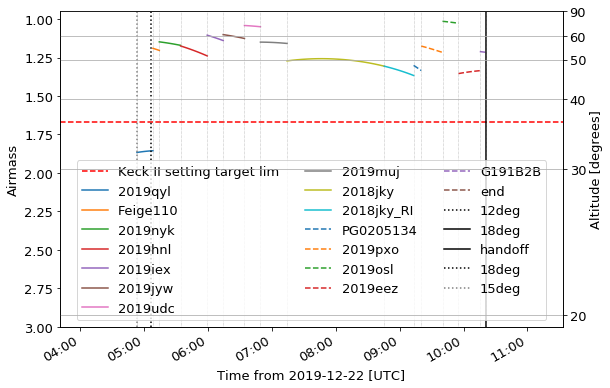

In [283]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', label='18deg', ls=':')
ax.axvline(pre_twi15deg.plot_date, color='gray', label='15deg', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_imaging.pdf')

KeyboardInterrupt: 

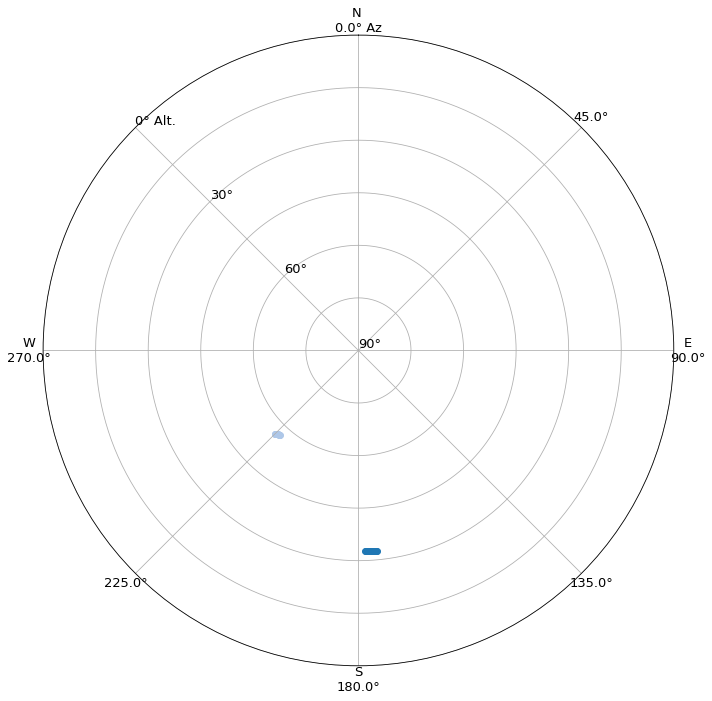

In [265]:
start_tbdata = tbdata['start']
polor_style = []
if np.size(start_tbdata) <= 10:
    for indx, cycle in enumerate(custom_cycler):
        polor_style.append(cycle)
else:
    colors = ['1f77b4','aec7e8','ff7f0e','ffbb78','2ca02c','98df8a','d62728','ff9896',
    '9467bd','c5b0d5','8c564b','c49c94','e377c2','f7b6d2','7f7f7f','c7c7c7','bcbd22','dbdb8d','17becf','9edae5']
    custom_cycler1 = cycler(linestyle=['-'])*cycler(color=colors)
    for indx, cycle in enumerate(custom_cycler1):
        polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
#obs_end = twi12deg
obs_end = handoff
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('1')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('0')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots_imaging.pdf')

# Backup Plan

In [ ]:
sn2019ust = astroplan.FixedTarget(coord=SkyCoord('00:54:22.42', '+31:40:12.6', unit=(u.hourangle, u.degree)),
                                  name='2019ust')
sn2019tua = astroplan.FixedTarget(coord=SkyCoord('21:58:00.29', '+24:15:56.9', unit=(u.hourangle, u.degree)),
                                  name='2019tua')
sn2019osl = astroplan.FixedTarget(coord=SkyCoord('04:38:54.33', '+18:50:10.2', unit=(u.hourangle, u.degree)),
                                  name='2019osl')
sn2019sox = astroplan.FixedTarget(coord=SkyCoord('21:31:24.76', '+02:29:39.0', unit=(u.hourangle, u.degree)),
                                  name='2019sox')

In [52]:
targets = [sn2019qyl, sn2019nyk, sn2019iex, sn2019jyw, AT2019udc, sn2019eez,
           sn2019osl, sn2019ust, sn2019tua, sn2019sox]

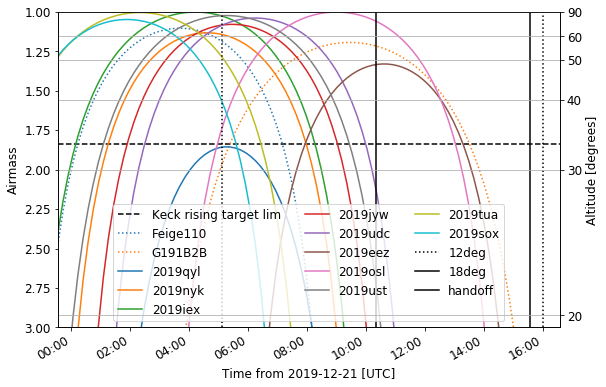

In [53]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.51, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_backup.pdf')

In [163]:
tab = """2019qyl  00:54:57.53   -37:38:39.5 19    1x600
Feige110  23:19:58.39   -05:09:55.8  11.83 1x60
2019tua  21:58:00.29   +24:15:56.9 17.5  1x300
2019nyk  00:15:15.21   -08:11:21.8 19.5  3x900
2019iex  23:51:03.61   +20:08:43.7 19    3x600
2019jyw  01:06:30.21   -02:11:56.3 19.5  3x900
2019ust  00:54:22.42   +31:40:12.6 17.5  1x300
2019udc  01:53:11.18   +04:11:46.9 19    3x600
2019osl  04:38:54.33   +18:50:10.2 19    3x600
2019eez  06:16:22.26   -21:21:35.7 19.5  3x900
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60
end      12:00:00.00   +00:00:00.0 11    1x0""" 
#
#
#
#

In [164]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [165]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [166]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
str10,str11,str11,str10,str10,float64,float64
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0
2019tua,21:58:00.29,+24:15:56.9,17.5,1x300,1.0,300.0
2019nyk,00:15:15.21,-08:11:21.8,19.5,3x900,3.0,900.0
2019iex,23:51:03.61,+20:08:43.7,19,3x600,3.0,600.0
2019jyw,01:06:30.21,-02:11:56.3,19.5,3x900,3.0,900.0
2019ust,00:54:22.42,+31:40:12.6,17.5,1x300,1.0,300.0
2019udc,01:53:11.18,+04:11:46.9,19,3x600,3.0,600.0
2019osl,04:38:54.33,+18:50:10.2,19,3x600,3.0,600.0


In [167]:
night_start = Time(pre_twi15deg.iso)
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [168]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

In [169]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [170]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
str10,str11,str11,str10,str10,float64,float64,object,str23
2019qyl,00:54:57.53,-37:38:39.5,19,1x600,1.0,600.0,2019-12-22 04:53:10.299,2019-12-22 04:53:10.299
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0,2019-12-22 05:08:10.299,2019-12-22 05:08:10.299
2019tua,21:58:00.29,+24:15:56.9,17.5,1x300,1.0,300.0,2019-12-22 05:14:10.299,2019-12-22 05:14:10.299
2019nyk,00:15:15.21,-08:11:21.8,19.5,3x900,3.0,900.0,2019-12-22 05:24:10.299,2019-12-22 05:24:10.299
2019iex,23:51:03.61,+20:08:43.7,19,3x600,3.0,600.0,2019-12-22 06:18:24.299,2019-12-22 06:18:24.299
2019jyw,01:06:30.21,-02:11:56.3,19.5,3x900,3.0,900.0,2019-12-22 06:57:38.299,2019-12-22 06:57:38.299
2019ust,00:54:22.42,+31:40:12.6,17.5,1x300,1.0,300.0,2019-12-22 07:51:52.299,2019-12-22 07:51:52.299
2019udc,01:53:11.18,+04:11:46.9,19,3x600,3.0,600.0,2019-12-22 08:01:52.299,2019-12-22 08:01:52.299
2019osl,04:38:54.33,+18:50:10.2,19,3x600,3.0,600.0,2019-12-22 08:41:06.299,2019-12-22 08:41:06.299


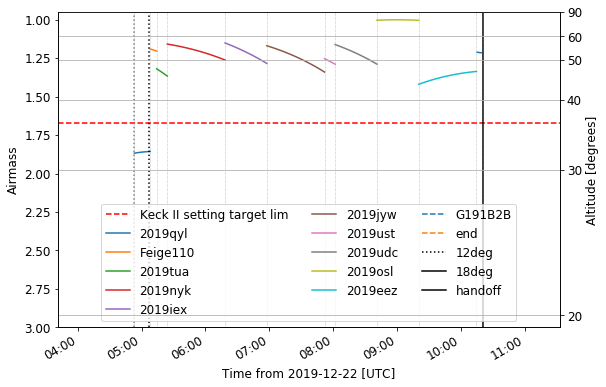

In [171]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
ax.axvline(pre_twi15deg.plot_date, color='gray', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')

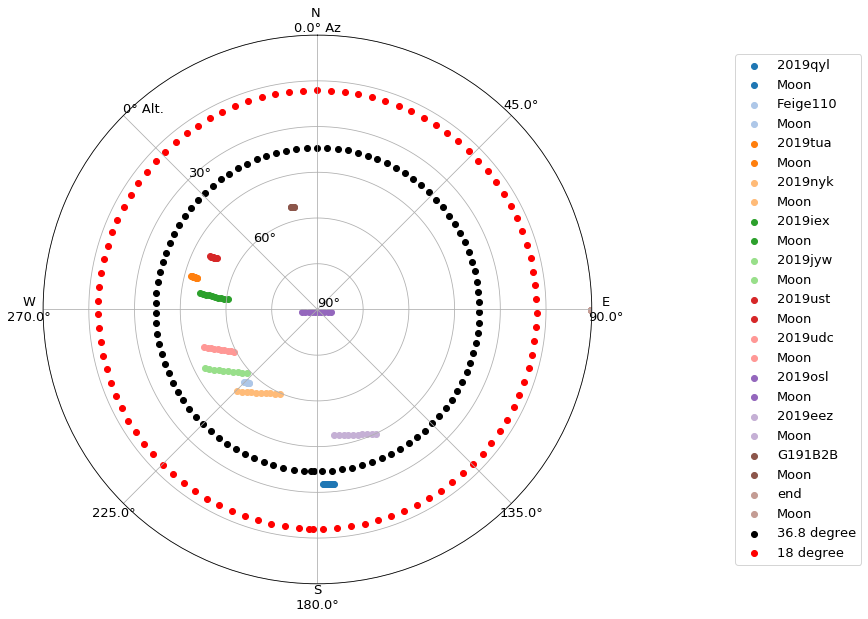

In [172]:
start_tbdata = tbdata['start']
polor_style = []
if np.size(start_tbdata) <= 10:
    for indx, cycle in enumerate(custom_cycler):
        polor_style.append(cycle)
else:
    colors = ['1f77b4','aec7e8','ff7f0e','ffbb78','2ca02c','98df8a','d62728','ff9896',
    '9467bd','c5b0d5','8c564b','c49c94','e377c2','f7b6d2','7f7f7f','c7c7c7','bcbd22','dbdb8d','17becf','9edae5']
    custom_cycler1 = cycler(linestyle=['-'])*cycler(color=colors)
    for indx, cycle in enumerate(custom_cycler1):
        polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
#obs_end = twi12deg
obs_end = handoff
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
        #print ('1')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots_backup.pdf')

# Imaging

In [ ]:
targets = [sn2019qyl, sn2019nyk, sn2019iex, sn2019jyw, AT2019udc, sn2019eez,
           sn2019osl, sn2019ust, sn2019tua, sn2019sox]